
## CNN классификатор на основе датасета Fashion MNIST


**Классификация изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 в оттенках серого. Имеется обучающий набор из 60 000 изображений и тестовый набор из 10 000 изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

### Загрузка данных

In [73]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Визаулизация датасета

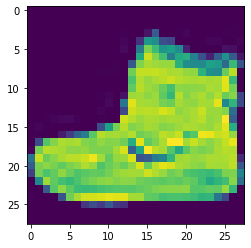

In [75]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

### Нормализация

#### Преобразование в one-хот вектор, у которого все нули кроме позиции, где содержится значение нарисованной цифры. Это нужно для определения функции потерь, так как на исходных значениях модель будет переобучаться

In [76]:
from keras.utils.np_utils import to_categorical

In [77]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Нейросеть выдает 10 значений вероятностей, мы хотим, чтобы max веростность была у нужной цифры

In [78]:
y_norm_train = to_categorical(y_train, 10)

y_norm_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [79]:
y_norm_test = to_categorical(y_test, 10)

y_norm_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Перевод значений яркости пикселей из 0-255 в 0-1 представление

In [80]:

x_train = x_train/255
x_test = x_test/255

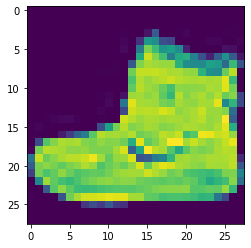

In [81]:
# картинки не изменились
plt.imshow(x_train[0])

#### Измение формы массивов X_train и X_test так, чтобы они стали 4-мерными
#### Размер тензора = (размер батча, высота изображения, ширина изображения, цветовой канал)

Right now our data is 60,000 images stored in 28 by 28 pixel array formation.
We need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [82]:
x_train.shape

(60000, 28, 28)

In [83]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [84]:
x_test.shape

(10000, 28, 28)

In [85]:
x_test = x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

## Создание модели

In [410]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [411]:
model = Sequential()

# сверточный слой - 32 фильтра, размер фильтра 4 на 4, размерность входных изображений, активация
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))

# пуллинг - уменьшение размерности картинок
model.add(MaxPool2D(pool_size=(2, 2)))

# выпрямление - картинка вытягивается в вектор и подается на вход в обычную нейросеть
model.add(Flatten())

# полносвязный слой из 128 нейронов
model.add(Dense(128, activation='relu'))

# выходной слой из 10 нейронов - классов с вероятностями от 0 до 1
# softmax активация для распределения вероятности из 128 в 10 (переход к 10 неотрицательным числам в сумме дающим 1)
model.add(Dense(10, activation='softmax'))


# измеряем потери, оптимизируем, считаем метрику
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [412]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               589952    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

### Тренировка модели

In [495]:
model.fit(x_train,y_norm_train,epochs=3) 

Epoch 1/3
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2192 - accuracy: 0.9216
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1994 - accuracy: 0.9289
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1845 - accuracy: 0.9350


### Оценка модели

In [499]:
predictions = model.predict(x_test)
ppred = predictions.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [500]:
ppred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [501]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ppred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.84      0.84      1000
           3       0.92      0.91      0.92      1000
           4       0.82      0.89      0.85      1000
           5       0.99      0.95      0.97      1000
           6       0.74      0.74      0.74      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Дополнительно
 
* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

In [520]:
# вытаскиваем веса сверточного слоя модели
weights = model.layers[0].get_weights()
weights[0].shape

(4, 4, 1, 32)

In [521]:
# конвертируем массив в тензор
weights_tensor = torch.FloatTensor(weights[0])

In [522]:
# изменяем размер тензора
ww = weights_tensor.reshape(32, 4, 4)

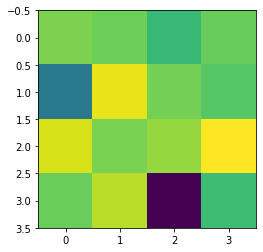

In [523]:
plt.imshow(ww[0])

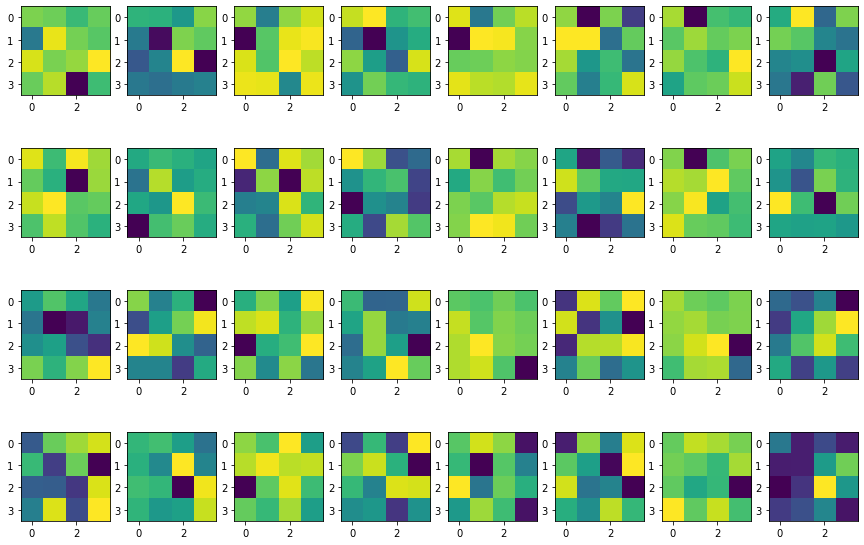

In [524]:
figure, axis = plt.subplots(4, 8)

figure.set_figheight(10)
figure.set_figwidth(15)

count = 0

for i in range(0, 4):
    for j in range(0, 8):
        axis[i, j].imshow(ww[count])
        count += 1       